In [ ]:
import tarfile
from pathlib import Path

if Path("data").exists() == False:
    tar = tarfile.open("dentalData.tar")
    tar.extractall("data")
    tar.close()

In [1]:
from pathlib import Path

main_path = Path("data")

all_img_paths = list(main_path.glob("train/img/*"))
all_mask_paths = list(main_path.glob("train/ann/*"))

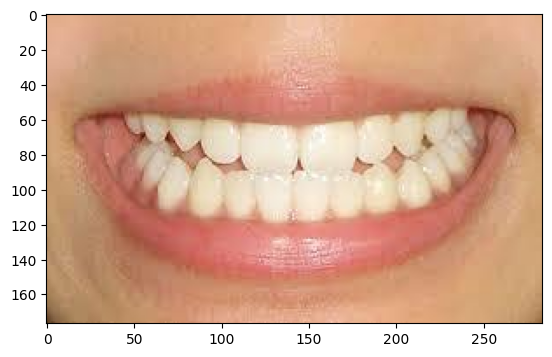

In [2]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

index = 1000

image = Image.open(all_img_paths[index])
img = np.array(image)
plt.imshow(img)

In [3]:
import json

with open(all_mask_paths[index], 'rb') as file:
    mask_data = json.load(file)

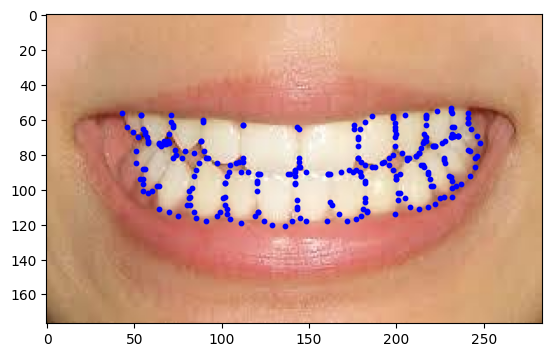

In [ ]:
plt.imshow(img)
for tooth in masks:
    pts = tooth["points"]["exterior"]
    for pt in pts:
        plt.scatter(pt[0], pt[1], c='b', s=10)

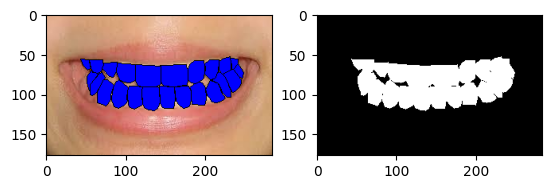

In [ ]:
from PIL import ImageDraw

raw_mask = Image.new('L', img.shape[:-1][::-1], 0)

for tooth in masks:
    pts = tooth["points"]["exterior"]
    ImageDraw.Draw(raw_mask).polygon(pts, outline=1, fill=1)
    ImageDraw.Draw(image).polygon(pts, outline=1, fill=(0, 0, 255))

plt.subplot(1, 2, 1)
plt.imshow(image)

plt.subplot(1, 2, 2)
plt.imshow(raw_mask, cmap=plt.cm.gray)